# Parcial computacional sobre Test de Hipótesis
## Esteban Lizaso - DNI: 35.375.488 - Libreta: 319/11 

Primero importo las librerías que voy a utilizar a los largo del ejercicio.

In [1]:
import numpy as np
from random import random
import math
import scipy
import scipy.stats as sci
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt
from math import pi

Defino todas las funciones que voy a usar en los siguientes items. Por una cuestión de practicidad dejo una descripción de lo que hace cada función justo antes de definirla. Estas van a ser todas las funciones que se van a utilizar en los items desde el 2 hasta el 7.

In [2]:
"""Función que devuelve los valores de una lista todos en mayúsculas."""
def mayusculas(l):
    k=[]
    for i in range(len(l)):
        k.append(l[i].upper())
    return k    


"""Función que revisa una lista en busca de elementos repetidos, y de haberlos, los elimina. Para eso barre todos los elementos
de la lista y compara con los que le siguen en busca de repeticiones. Luego, guarda los índices correspondientes a las
repeticiones. Por último, recorre esos índices del mayor al menos, eliminandolos de la lista. Lo hace en este orden, ya que
si fuese del menor al mayor, los elementos repetidos subsiguientes ahora estarían en un índice menor, ya que ha desaparecido
un elemento delante de ellos."""
def sacarrepetidas(l):
    k=[]
    for i in range(len(l)):
        for j in range(i,len(l)):
            if l[i]==l[j] and i!=j:
                k.append(i)
    for i in reversed(k):
        l.pop(i)
    return l


"""Función que dada una patente devuelve el natural correspondiente a la misma. Este natural corresponde al orden
que tiene la patente dentro de todas las que se han creado. Para hacerlo utiliza el ordinal que posee cada letra (o número)
dentro de los caracteres ASCII, y se le resta el número de valores previos al mismo. De esta forma a la letra A se le asigna
el número 0 y a la B el 1 (etc.), y los números del 0 al 9 se les asigna su respectivo valor. Por último el natural
correspondiente a la patente lo calcula como si realizase una conversión de elementos de una base (decimal) a otra (que es
una mezcla de elementos en base 10 y base 26). El procedimiento es similar al que se utiliza para convertir números de 
binario a decimal, solo que en este caso, los elementos no son de base 2, sino que algunos son de base 10 y otros de
base 26."""
def numeropatente(a):
    p1 = ord(a[0])-65
    p2 = ord(a[1])-65
    p3 = ord(a[2])-48
    p4 = ord(a[3])-48
    p5 = ord(a[4])-48
    p6 = ord(a[5])-65
    p7 = ord(a[6])-65
    n = p1*(26**3)*(10**3)+p2*(26**2)*(10**3)+p3*(26**2)*(10**2)+p4*(26**2)*10+p5*(26**2)+p6*26+p7+1
    return n

"""Función que convierte a números naturales todas las patentes de una lista utilizando la función anterior"""
def patentesanatural(l):
    l = mayusculas(l)
    k = []
    for i in range(len(l)):
        k.append(numeropatente(l[i]))
    k.sort()
    return k


"""Función que calcula la distancia entre una función escalera (la del Test de Kolmogorov-Smirnov) y una distribución uniforme.
Para eso utiliza los valores de la altura de los escalones (que provienen de l1) y los resta con el valor de la distribución
uniforme. Esta operación lo hace para los valores de x donde se encuentran las subidas de los escalones (que provienen de l2).
Para que el proceso de calculo de distancias sea más rápido, la distancia la calcula siempre entre la punta del escalon cuando
subió, o el vértice dle mismo justo antes de subir. Esto es así porque geométricamente esos puntos son los que mayor distancia
podrían tener a la uniforme en los casos en que los escalones pasen por arriba (la mayor distancia es desde la punta del
escalón ya subido) o por debajo (la mayor distancia es justo antes de subir el escalón) de esta. Por último de estas dos
listas de distancias (distancias 1 y 2) se queda con la que posea la mayor distancia, y ese será el estadístico de Kolmogorov.
A su vez la función devuelve la posición del x que posee esta distancia, y un vector que posee en todas sus componentes el
valor de este 'x' (que será una patente para nosotros) y otro vector que posee todos los valores de 'y' entre la función
escalón y la dist. uniforme. Estos últimos 3 valores son solo para poder graficar la línea que muestra la mayor distancia."""
def distancia(l1,l2,e):
    i=0
    distancias1 = list(np.absolute(l1-sci.uniform.cdf(l2,patente1,patenteultima)))
    distancias2 = list(np.absolute((l1-e)-sci.uniform.cdf(l2-1,patente1,patenteultima)))
    if max(distancias1) > max(distancias2):
        i = distancias1.index(max(distancias1))
        t_max = max(distancias1)
        x_max = np.ones(100)*l2[i]
        y_max = np.linspace(l1[i],sci.uniform.cdf(l2[i],patente1,patenteultima),100)
    else:
        i = distancias2.index(max(distancias2))
        t_max = max(distancias2)
        x_max = np.ones(100)*l2[i]
        y_max = np.linspace(l1[i]-e,sci.uniform.cdf(l2[i]-1,patente1,patenteultima),100)
    return t_max, i, x_max, y_max


"""Función que genera variables aleatoria con distribución exponencial (de coeficiente beta) entre a y b, de forma normalizada.
La función devuelve un vector con las variables aleatorias, y el factor de normalización utilizado para la misma"""
def exponencial_densidad(x,a,b,beta):
    y = []
    for i in range(len(x)):
        if x[i] <= b:
            y.append(sci.expon.pdf(x[i],a,beta))
        else:
            y.append(0)
    c = scipy.integrate.trapz(y,x)
    y = np.array(y/c)
    return y, c


"""Función que genera la distribución de probabilidad de variables aleatorias exponenciales (de coeficiente beta) entre a y b.
Para esto utiliza la función expon de scipy, y a los valores generados por encima del valor b, les asigna un 1. Para que esta
distribución este normalizada correctamente (es decir que los valores previos a b tiendan a 1) se utiliza el factor de
normalización qu devuelve la función exponencial_densidad"""
def exponencial_prob(x,a,b,beta):
    y = []
    c = exponencial_densidad(x,a,b,beta)[1]
    for i in range(len(x)):
        if x[i] <= b:
            y.append(sci.expon.cdf(x[i],a,beta)/c)
        else:
            y.append(1)
    y = np.array(y)
    return y
        

"""Función que simula una muestra de n patentes provenientes de una distribución uniforme entre a y b"""
def sim_patentes_uniforme(a,b,n):
    y = np.random.randint(a,b+1,n)
    return y 


"""Función que simula una muestra de n patentes provenientes de una distribución exponencial (de coeficiente beta)
entre a y b"""
def sim_patentes_exp(a,b,beta,n):
    y = []
    while len(y)<n:
        c = int(np.random.exponential(beta))
        if a <= c <= b:
            y.append(c)
    y = np.array(y)
    return y 


"""Función que calcula el p-valor de una medición (tm) en una muestra (l). La función puede calcular el p-valor a derecha,
izquierda o dos colas según se indique. Para esto, toma todos los valores de la muestra mayores o iguales al
medido (si lo estamos a derecha por ejemplo) y calcula la probabilidad de obtener algo 'peor' a lo medido como la cantidad
de valores de la muestra mayores a lo medido sobre la cantidad de valores totales. En el caso a dos colas, calcula el p-valor
por izquierda y por derecha, y luego toma el mínimo y multiplica por 2.
Además, en caso de que uno ingrese un valor no válido para la variable 'lado' el programa nos avisa"""
def pvalor(l,tm,lado):
    p = 0
    p1 = 0
    p2 = 0
    if lado == 'derecha':
        for i in range(len(l)):
            if l[i] >= tm:
                p = p + 1
        p = p/len(l)
    elif lado == 'izquierda':
        for i in range(len(l)):
            if l[i] <= tm:
                p = p + 1
        p = p/len(l)
    elif lado == 'doscolas':
        for i in range(len(l)):
            if l[i] > tm:
                p1 = p1 + 1
            elif l[i] < tm:
                p2 = p2 + 1
            elif l[i] == tm:
                p1 = p1 + 1
                p2 = p2 + 1
        p = 2*min(p1/len(l),p2/len(l))
    else:
        p = ('El parámetro lado no puede valer', lado)
    return p



"""Función que calcula la potencia de un test. La función puede calcular la potencia a izquierda o derecha
según se indique. Para esto utiliza dos muestras de distribuciones distintas (l1 como H0 y l2 como H1) y si el calculo es
a derecha (es decir que comparando H0 contra H1, la esperanza de H1 se encuentra a la derecha de H0) ordena las muestras
de mayor a menor. En caso contrario (a izquierda) las ordena de menor a mayor. Luego, teniendo en cuenta que la probabilidad
será la cantidad de valores que cumplen cierta condicion sobre la cantidad de valores totales, calcula el índice del valor de
corte (valor crítico) como el que se obtiene de multiplicar la significancia alpha por la cantidad de valores en la muestra
(y truncar). Luego para la muestra correspondiente a H1 (l2) se fija cuantos valores son mayores al crítico (en el caso de
comparación a derecha) y los cuenta. Finalmente obtiene la potencia como todos los valores de H1 mayores al crítico sobre la
cantidad de valores totales de H1.
Además, en caso de que uno ingrese un valor no válido para la variable 'lado' el programa nos avisa"""
def potencia(l1,l2,alpha,lado):
    c = 0
    if lado == 'derecha':
        l1.sort(reverse=True)
        l2.sort(reverse=True)
        i = int(alpha*len(l1))
        tc = l1[i-1]
        for j in range(len(l2)):
            if l2[j]>=tc:
                c = c + 1
        P = c/len(l2)
    elif lado == 'izquierda':
        l1.sort()
        l2.sort()
        i = int(alpha*len(l1))
        tc = l1[i-1]
        for j in range(len(l2)):
            if l2[j]<=tc:
                c = c + 1
        P = c/len(l2)
    else:
        print('El parámetro lado no puede valer', lado)
        tc = 'error'
        P = 'error'
    return tc, P


"""Función que realiza la aproximación de Stirling sobre un dado número n"""
def stirling(n):
    s = (n*(np.log(n)))-n+((1/2)*(np.log(2*pi*n)))+(1/(12*n))
    return s


"""Función que calcula la probabilidad de m (el natural correspondiente a la patente más nueva observada), en función del
número total de patentes nuevas observadas k y del número de autos con patentes nuevas en circulación n, es decir la P(m|k,n).
Para eso calcula los combinatorios utilizando la aproximación de Stirling."""
def probpatentemasnueva(m,k,n):
    s1 = stirling(m-1)-stirling(k-1)-stirling(m-k)
    s2 = stirling(n)-stirling(k)-stirling(n-k)
    p = np.exp(s1-s2)
    return p


"""Función que calcula la probabilidad de n (el número de autos con patentes nuevas en circulación), en función del número
taotal de patentes nuevas observadas k y del natural correspondiente a la patnete más nueva observada, es decir la P(n|k,m).
Para hacer esto toma los valores de k y m fijos y calcula la prob P(m|k,n) para un intervalo de n adecuado. Este intervalo
lo crea barriendo desde m hasta más infinito, hasta que la probabilidad dentro del intervalo sea aproximadamente 0.999.
Además devuelve un vector con todos los valores de patentes del intervalo [m,n] y un vector con sus valores de probabilidad
(o densidad de probabilidad). También devuelve para que patentes (de índices c1 y c2) se alcanzó una probabiliad del 68% en
el intervalo [m,c1+m] y del 95% en el intervalo [m,c2+m]."""
def bayes(m,k):
    patentesposibles=[]
    y_patentesposibles = []
    I = scipy.integrate.trapz(y_patentesposibles,patentesposibles)
    h = m
    p = 0
    c1 = 0
    c2 = 0
    while I < 0.999:
        p = probpatentemasnueva(m,k,h)
        if I < 0.68:
            c1 = c1+1
        if I < 0.95:
            c2 = c2+1
        I = I+p
        h = h+1
    
    patentesposibles = np.arange(m,h,1)
    for i in range(len(patentesposibles)):
        p = probpatentemasnueva(m,k,patentesposibles[i])
        y_patentesposibles.append(p)
    
    return patentesposibles, y_patentesposibles, c1, c2


"""Función que repite la operatoria del la función 'bayes', solo que devuelve las patentes de los intervalos de prob. 68%
 y 95%. Útil para obtener los valores límite de los intervalos pero no los vectores que sirven para graficar."""
def bayes_intervalo(m,k):
    I = 0
    h = m
    p = 0
    c1 = 0
    c2 = 0
    while I < 0.999:
        p = probpatentemasnueva(m,k,h)
        if I < 0.68:
            c1 = c1+1
        if I < 0.95:
            c2 = c2+1
        I = I+p
        h = h+1
            
    return c1 + m, c2 + m
        

"""Función que crea una matriz de dos columnas donde la primera posee una lista de patentes y la otra un cierto valor que
sirve como 'marcador'. De esa forma podrán ahcerse operaciones con la lista de patentes (como mezclarlas con otra para el
test de Wilcoxon) y tener marcadas que patentes corresponden a que lista."""
def marcarlista(l,j):
    L = np.zeros((len(l),2))
    for i in range(len(l)):
        L[i][0] = int(l[i])
        L[i][1] = int(j)
    L = L.astype(int)
    return L
    

"""Función que realiza el test de Wilcoxon sobre dos muestras. Para eso primero controla que muestra es más chica y a esa
la marca como '1'. Luego mezcla las muestras y las ordena según su número de patente, para calcular el estadístico
como la suma de las posiciones de las patentes marcadas como '1'. A su vez devuelve el valor mínimo que podría tener el test,
el máximo, su esperanza y varianza."""
def wilcoxon(l1,l2):
    w = 0
    if len(l1)<=len(l2):
        n = len(l1)
        m = len(l2)
        l1 = marcarlista(l1,1)
        l2 = marcarlista(l2,2)
    else:
        n = len(l2)
        m = len(l1)
        l1 = marcarlista(l1,2)
        l2 = marcarlista(l2,1)
    l = np.array(list(l1) + list(l2))
    l = l[l[:,0].argsort()]
    for i in range(len(l)):
        if l[i][1] == 1:
            w = w + i + 1
    w_min = n*(n+1)/2
    w_max = (n*(n+1)/2) + (m*n)
    w_med = (n+m+1)*n/2
    w_var = (n+m+1)*n*m/12
    return w, w_min, w_max, w_med, w_var


"""Función que calcula el Sx cuadrado como está definido en el problema 4 de la guía 8 de Test de Hipotesis"""
def sxcuadrado(l):
    s = 0
    p = sum(l)/len(l)
    for i in range(len(l)):
        s = s + (l[i] - p)**2
    return s


"""Función que calcula el estadístico definidoen el problema 4 de la guía 8 de Test de Hipotesis"""
def prob4 (l1,l2):
    p1 = sum(l1)/len(l1)
    p2 = sum(l2)/len(l2)
    n = len(l2)
    m = len(l1)
    s1 = sxcuadrado(l1)
    s2 = sxcuadrado(l2)
    U = (p1-p2)*(((m+n-2)/(((1/m)+(1/n))*(s1+s2)))**(1/2))
    return U


"""Función que simula la distribución del estadístico T = -2*np.log(x1*x2) si los valores de x1 y x2 provienen de respectivas
distribuciones uniformes. Para eso genera n valores con distribución uniforme para x1 y n para x2, y luego les calcula el
estadístico T, y devuelve un vector con los 'n' T calculados."""
def T(n):                               
    x1=[]
    x2=[]                                 
    y=[]
    for i in range(n):                      
        x1.append(np.random.uniform(0,1))
        x2.append(np.random.uniform(0,1))
    x1 = np.array(x1)
    x2 = np.array(x2)
    for i in range(len(x1)):             
        y.append(-2*np.log(x1[i]*x2[i]))  
    y = np.array(y)                       
    return y

## 2 - Estadística en la calle

Primero voy a importar mis patentes desde archivos .txt y les voy a aplicar todas las funciones necesarias para
convertirlas a naturales. Tengo muestras de Villa Urquiza (patentes), de Villa Elisa - Entre Rios (patentes2), de Belgrano (patentes3) y de Quilmes (patentes4).
A su vez voy a definir algunas variables útiles:
- Los naturales correspondientes a la primer patente (AA000AA), a la última posible (ZZ999ZZ) y a la más nueva en circulación (AD592MF).
- El tamaño de las muestras de patentes de cada lugar.
- Los naturales correspondientes a la patente más nueva observada en cada lugar.

In [3]:
#---------------------------------------------------------------------------------------------------------------------------
patentes = np.genfromtxt("Patentes/patentesvillurca.txt", dtype = str)
patentes = np.array(patentesanatural(mayusculas(sacarrepetidas(list(patentes)))))

patentes2 = np.genfromtxt("Patentes/patentesentrerios.txt", dtype = str)
patentes2 = np.array(patentesanatural(mayusculas(sacarrepetidas(list(patentes2)))))

patentes3 = np.genfromtxt("Patentes/patentesbelgrano.txt", dtype = str)
patentes3 = np.array(patentesanatural(mayusculas(sacarrepetidas(list(patentes3)))))

patentes4 = np.genfromtxt("Patentes/patentesquilmes.txt", dtype = str)
patentes4 = np.array(patentesanatural(mayusculas(sacarrepetidas(list(patentes4)))))
#---------------------------------------------------------------------------------------------------------------------------
patente1 = numeropatente('AA000AA')
patenteultima = numeropatente('AD592MF')
patentefinal = numeropatente('ZZ999ZZ')
#---------------------------------------------------------------------------------------------------------------------------
print('A la patente más vieja (AA000AA) le coresponde el número', patente1)
print('A la patente más nueva en circulación (AD592MF) le coresponde el número', patenteultima)
print('A la patente más grande posible con este sistema (ZZ999ZZ) le coresponde el número', patentefinal)

k = len(patentes)
patentenueva = patentes[-1]

k2 = len(patentes2)
patentenueva2 = patentes2[-1]

k3 = len(patentes3)
patentenueva3 = patentes3[-1]

k4 = len(patentes4)
patentenueva4 = patentes4[-1]

print('En Villa Urquiza anoté', k,'patentes distintas, y la patente más nueva que vi fue la n°', patentenueva)
print('En Villa Elisa (ER) anoté', k2,'patentes distintas, y la patente más nueva que vi fue la n°', patentenueva2)
print('En Belgrano anoté', k3,'patentes distintas, y la patente más nueva que vi fue la n°', patentenueva3)
print('En Quilmes anoté', k4,'patentes distintas, y la patente más nueva que vi fue la n°', patentenueva4)


A la patente más vieja (AA000AA) le coresponde el número 1
A la patente más nueva en circulación (AD592MF) le coresponde el número 2428510
A la patente más grande posible con este sistema (ZZ999ZZ) le coresponde el número 456976000
En Villa Urquiza anoté 179 patentes distintas, y la patente más nueva que vi fue la n° 2366584
En Villa Elisa (ER) anoté 63 patentes distintas, y la patente más nueva que vi fue la n° 2332835
En Belgrano anoté 82 patentes distintas, y la patente más nueva que vi fue la n° 2339506
En Quilmes anoté 121 patentes distintas, y la patente más nueva que vi fue la n° 2218499


## 3 -  ¿Uniformemente distribuidos?

Para ver si las patentes que observé provienen de una distribución uniforme les voy a aplicar el test de Kolmogorov-Smirnov. Esto lo hago para las 4 muestras de patentes. A su vez las voy a comparar con una distribución exponencial de λ = 4×e−7 (beta = 1/λ) como hipotesis alternativa.

In [4]:
"""Primero me armo un vector que contenga algunos naturales más a cada lado de las patentes que hay en circulación.
Eso quiere decir algunos valores negativos, y alguos mayores a la patente más nueva en circulación. Esto solamente con
el motivo de poder graficar las distribuciones en esos valores también y ver que dan 0 o 1 en los casos que corresponden a
patentes menores a 1 y mayores a la más grande en circulación."""
xgrande = np.arange(-patenteultima/10,patenteultima+patenteultima/10,patenteultima/1000)

"""También armo un vector que contenga solo a las patentes en circulación para poder graficar más cómodamente luego"""
x = np.arange(patente1,patenteultima+1,patenteultima/100)

"""Luego calculo la altura de los escalones de Kolmogorov para cada muestra de patentes, y armo un vector con dichos valores de escalones
para poder graficarlos y usarlos en calcular la distancia entre ellos y una distribución uniforme."""
e = 1/k
ye = np.linspace(e,1,k)

e2 = 1/k2
ye2 = np.linspace(e2,1,k2)

e3 = 1/k3
ye3 = np.linspace(e3,1,k3)

e4 = 1/k4
ye4 = np.linspace(e4,1,k4)


"""Luego, usando la función distancia obtengo el valor del estadístico de Kolmogorov-Smirnov para las 4 muestras."""
t_max , i, x_max, y_max = distancia(ye,patentes,e)
print('El estadístico de Kolmogorov-Smirnov es', round(t_max,3),'para la muestra de Villa Urquiza')

t_max2 , i2, x_max2, y_max2 = distancia(ye2,patentes2,e2)
print('El estadístico de Kolmogorov-Smirnov es', round(t_max2,3),'para la muestra de Entre Rios')

t_max3 , i3, x_max3, y_max3 = distancia(ye3,patentes3,e3)
print('El estadístico de Kolmogorov-Smirnov es', round(t_max3,3),'para la muestra de Belgrano')

t_max4 , i4, x_max4, y_max4 = distancia(ye4,patentes4,e4)
print('El estadístico de Kolmogorov-Smirnov es', round(t_max4,3),'para la muestra de Quilmes')

El estadístico de Kolmogorov-Smirnov es 0.061 para la muestra de Villa Urquiza
El estadístico de Kolmogorov-Smirnov es 0.083 para la muestra de Entre Rios
El estadístico de Kolmogorov-Smirnov es 0.132 para la muestra de Belgrano
El estadístico de Kolmogorov-Smirnov es 0.171 para la muestra de Quilmes


Ahora grafico primero la densidad de probabilidad de la exponencial (normalizada) para ver como es en el intervalo de las patentes posibles en circulación, y muestro como quedan las dos distribuciones teóricas (uniforme y exponencial).

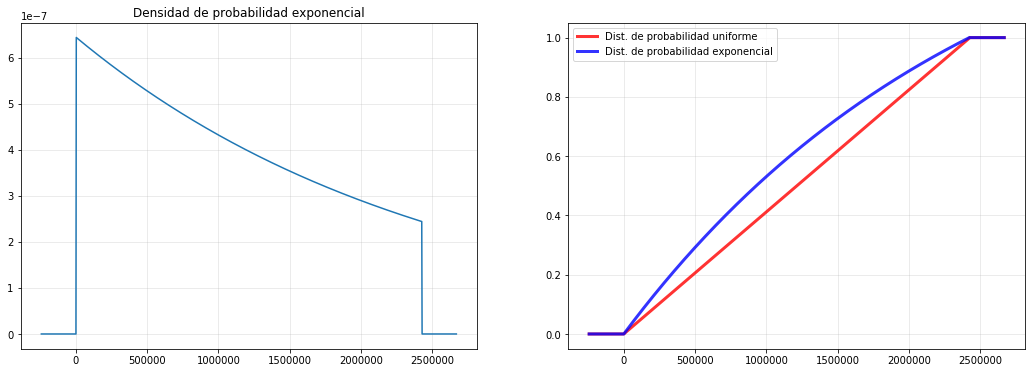

In [5]:
beta = 1/(4*10**(-7))

#Distribución de la exponencial para la cuál utilizo mi función 'exponencial_densidad'.
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(xgrande,exponencial_densidad(xgrande,patente1,patenteultima,beta)[0])
plt.title(('Densidad de probabilidad exponencial'))
plt.grid(alpha=0.3)

#Distribuciones teóricas. Para la distribución exponencial utilizo mi función 'exponencial_prob'.
plt.subplot(1,2,2)
plt.plot(xgrande,sci.uniform.cdf(xgrande,patente1,patenteultima),'r-', lw=3, alpha=0.8)
plt.plot(xgrande,exponencial_prob(xgrande,patente1,patenteultima,beta),'b-', lw=3, alpha=0.8)
plt.legend(('Dist. de probabilidad uniforme','Dist. de probabilidad exponencial'))
plt.grid(alpha=0.3)

Ahora si, grafico las muestras junto a las distribuciones teóricas para ver 'a ojo' como quedan. Además marco dónde se encuentra la mayor distancia entre las muestras con la distribución del test de Kolmogorov y las teóricas.
Realizo un zoom sobre el gráfico de Villa Urquiza para ver bien el estadístico de Kolmogorov.

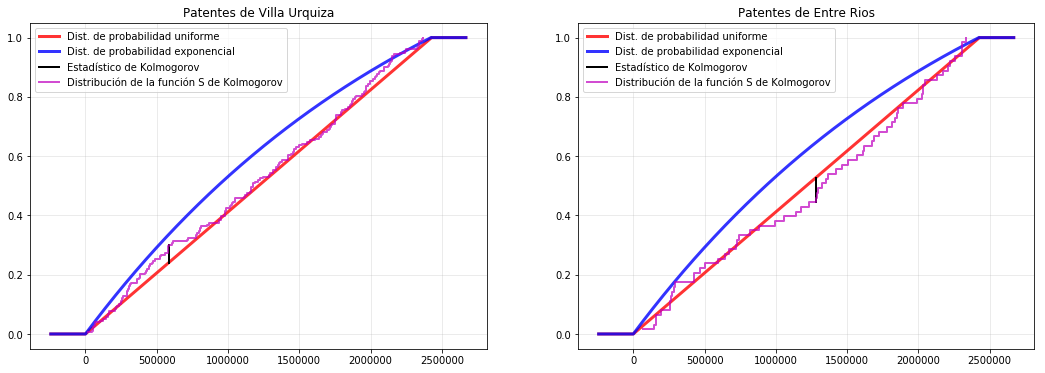

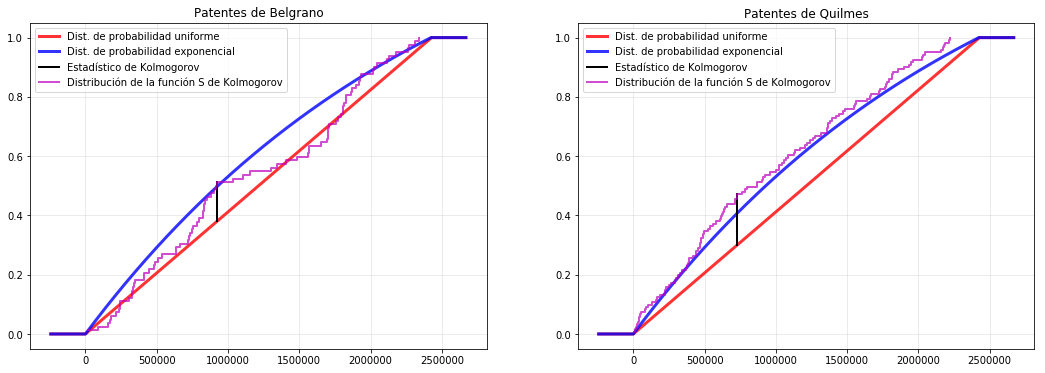

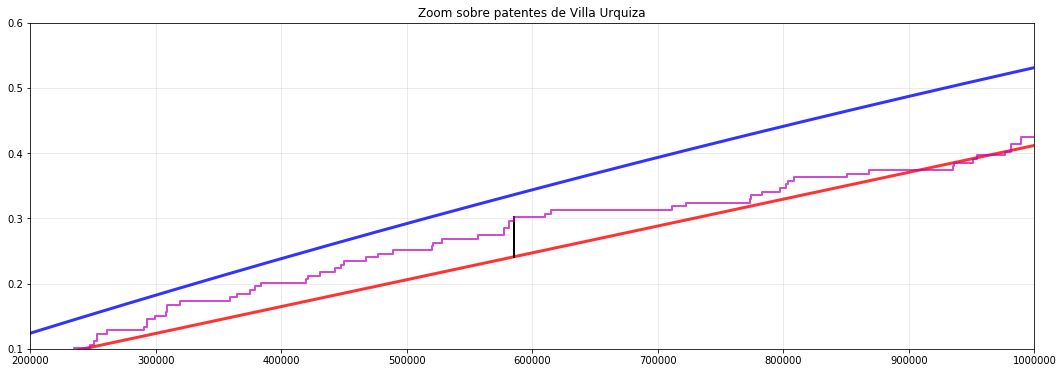

In [6]:
"""Acá solamente realizo lso gráficos de las funciones S de Kolmogorov realizadas con las muestras de patentes contra las
distribuciones teóricas uniforme y exponencial."""
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(xgrande,sci.uniform.cdf(xgrande,patente1,patenteultima),'r-', lw=3, alpha=0.8)
plt.plot(xgrande,exponencial_prob(xgrande,patente1,patenteultima,beta),'b-', lw=3, alpha=0.8)
plt.plot(x_max,y_max,'k', lw=2, alpha=1)
plt.step(patentes,ye, where = 'post', color='m', lw=2, alpha=0.7)
plt.title('Patentes de Villa Urquiza')
plt.legend(('Dist. de probabilidad uniforme','Dist. de probabilidad exponencial','Estadístico de Kolmogorov',
            'Distribución de la función S de Kolmogorov'))
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(xgrande,sci.uniform.cdf(xgrande,patente1,patenteultima),'r-', lw=3, alpha=0.8)
plt.plot(xgrande,exponencial_prob(xgrande,patente1,patenteultima,beta),'b-', lw=3, alpha=0.8)
plt.plot(x_max2,y_max2,'k', lw=2, alpha=1)
plt.step(patentes2,ye2, where = 'post', color='m', lw=2, alpha=0.7)
plt.title('Patentes de Entre Rios')
plt.legend(('Dist. de probabilidad uniforme','Dist. de probabilidad exponencial','Estadístico de Kolmogorov',
            'Distribución de la función S de Kolmogorov'))
plt.grid(alpha=0.3)

#---------------------------------------------------------------------------------
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(xgrande,sci.uniform.cdf(xgrande,patente1,patenteultima),'r-', lw=3, alpha=0.8)
plt.plot(xgrande,exponencial_prob(xgrande,patente1,patenteultima,beta),'b-', lw=3, alpha=0.8)
plt.plot(x_max3,y_max3,'k', lw=2, alpha=1)
plt.step(patentes3,ye3, where = 'post', color='m', lw=2, alpha=0.7)
plt.title('Patentes de Belgrano')
plt.legend(('Dist. de probabilidad uniforme','Dist. de probabilidad exponencial','Estadístico de Kolmogorov',
            'Distribución de la función S de Kolmogorov'))
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(xgrande,sci.uniform.cdf(xgrande,patente1,patenteultima),'r-', lw=3, alpha=0.8)
plt.plot(xgrande,exponencial_prob(xgrande,patente1,patenteultima,beta),'b-', lw=3, alpha=0.8)
plt.plot(x_max4,y_max4,'k', lw=2, alpha=1)
plt.step(patentes4,ye4, where = 'post', color='m', lw=2, alpha=0.7)
plt.title('Patentes de Quilmes')
plt.legend(('Dist. de probabilidad uniforme','Dist. de probabilidad exponencial','Estadístico de Kolmogorov',
            'Distribución de la función S de Kolmogorov'))
plt.grid(alpha=0.3)




"""Realizo un zoom de la zona en la que está la mayor distancia entre S y la distribución teórica.
Lo hago solo para la muestra de Villa Urquiza"""
plt.figure(figsize=(18,6))
plt.plot(xgrande,sci.uniform.cdf(xgrande,patente1,patenteultima),'r-', lw=3, alpha=0.8)
plt.plot(x_max,y_max,'k', lw=2, alpha=1)
plt.step(patentes,ye, where = 'post', color='m', lw=2, alpha=0.7)
plt.plot(xgrande,exponencial_prob(xgrande,patente1,patenteultima,beta),'b-', lw=3, alpha=0.8)
plt.xlim([200000,1000000])
plt.ylim([0.1,0.6])
plt.title('Zoom sobre patentes de Villa Urquiza')
plt.grid(alpha=0.3)

Se puede ver a simple vista que las patentes de Villa Urquiza parecen venir de una distribución uniforme. Las de Entre Rios no coinciden tanto con la uniforme (su estadístico da poco menos del doble que el de Villa Urquiza), pero no olvidemos también que provienen de la muestra más pequeña, con lo cuál no es raro pensar que tengan una fluctuación más grande.
Lo raro viene en las patentes de Belgrano y Quilmes. Por un lado las de Belgrano parecieran tener una mayor concentración de patente que comienzan con AA y con AC, respecto de las demás. La peor parte se la llevan las patente de Quilmes, que **parecieran venir de una exponencial!!!**. Esto puede deberse a que las patentes de Quilmes en realidad no fueron obtenidas mirando en la calle (como las demas muestras) sino que provienen de denuncias de autos robados del partido de Quilmes. Podría en otra ocación hacerse un análisis más minusioso sobre si tiene sentido pensar que las patentes de autos robados tienen una distribución exponencial y por qué.

Luego simulé dos muestras de patentes, una con distribución uniforme y otra con exponencial, y a ambas les apliqué el test de Kolmogorov, y grafiqué también la distribución del estadístico S de Kolmogorov contra las teóricas.
Todas las simulaciones realizadas de aquí en más en el parcial son para k  muestras, con k el número de patentes tomadas en Villa Urquiza, que es la muestra más grande de patentes.

El estadístico de Kolmogorov-Smirnov es 0.068 para una muestra proveniente de una distribución uniforme
El estadístico de Kolmogorov-Smirnov es 0.175 para una muestra proveniente de una distribución exponencial con lambda =  4e-07


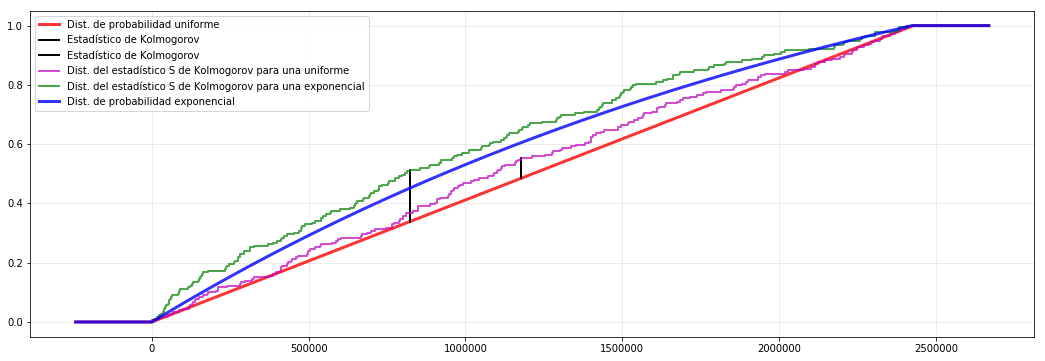

In [7]:
"""Primero genero dos vectores de patentes generadas con distribuciones uniforme y expoencial, y los ordeno de mayor a menor"""
yu = sim_patentes_uniforme(patente1,patenteultima,k)
yexp = sim_patentes_exp(patente1,patenteultima,beta,k)
yu.sort()
yexp.sort()

"""Calculo el estadístico de Kolmogorov para ambos vectores de patentes"""
t_maxu , iu, x_maxu, y_maxu = distancia(ye,yu,e)
t_maxexp , iexp, x_maxexp, y_maxexp = distancia(ye,yexp,e)

print('El estadístico de Kolmogorov-Smirnov es', round(t_maxu,3),'para una muestra proveniente de una distribución uniforme')
print('El estadístico de Kolmogorov-Smirnov es', round(t_maxexp,3),
      'para una muestra proveniente de una distribución exponencial con lambda = ',1/beta)

"""Grafico ambas funciones S de Kolmogorov contra las curvas teóricas de distribuciones uniforme y exponencial"""
plt.figure(figsize=(18,6))
plt.plot(xgrande,sci.uniform.cdf(xgrande,patente1,patenteultima),'r-', lw=3, alpha=0.8)
plt.plot(x_maxu,y_maxu,'k', lw=2, alpha=1)
plt.plot(x_maxexp,y_maxexp,'k', lw=2, alpha=1)
plt.step(yu, ye, where = 'post', color='m', lw =2, alpha=0.7)
plt.step(yexp, ye, where = 'post', color='g', lw =2, alpha=0.7)
plt.plot(xgrande,exponencial_prob(xgrande,patente1,patenteultima,beta),'b-',lw=3,alpha=0.8)
plt.legend(('Dist. de probabilidad uniforme','Estadístico de Kolmogorov','Estadístico de Kolmogorov',
            'Dist. del estadístico S de Kolmogorov para una uniforme',
            'Dist. del estadístico S de Kolmogorov para una exponencial','Dist. de probabilidad exponencial',))
plt.grid(alpha=0.3)

Se puede ver a simple vista que las muestras coinciden con sus distribuciones esperadas, y que el estadístico de Kolmogorov es mucho mayor para la muestra proveniente de una exponencial.

Ahora realizo N = 10000 simulaciones de muestras de patentes provenientes de distribuciones uniformes y exponenciales, y a todas ellas les calculo el estadístico de Kolmogorov para poder realizar dos histogramas y compararlos. Para eso también calculo el p-valor del estadístico que obtuve para las patentes de Villa Urquiza, Entre Rios, Belgrano y Quilmes, teniendo en cuenta que me piden una significancia α = 0.05. Por último, calculo la potencia del test.

El p-valor del test de Kolmogorov-Smirnov es 0.5149 y al ser mayor que la significancia alpha = 0.05 , se acepta la hipótesis nula para las patentes de Villa Urquiza
El p-valor del test de Kolmogorov-Smirnov es 0.1631 y al ser mayor que la significancia alpha = 0.05 , se acepta la hipótesis nula para las patentes de Entre Rios
El p-valor del test de Kolmogorov-Smirnov es 0.0023 y al ser menor o igual que la significancia alpha = 0.05 , se rechaza la hipótesis nula para las patentes de Belgrano
El p-valor del test de Kolmogorov-Smirnov es 0.0 y al ser menor o igual que la significancia alpha = 0.05 , se rechaza la hipótesis nula para las patentes de Quilmes
La potencia del test es 0.9277


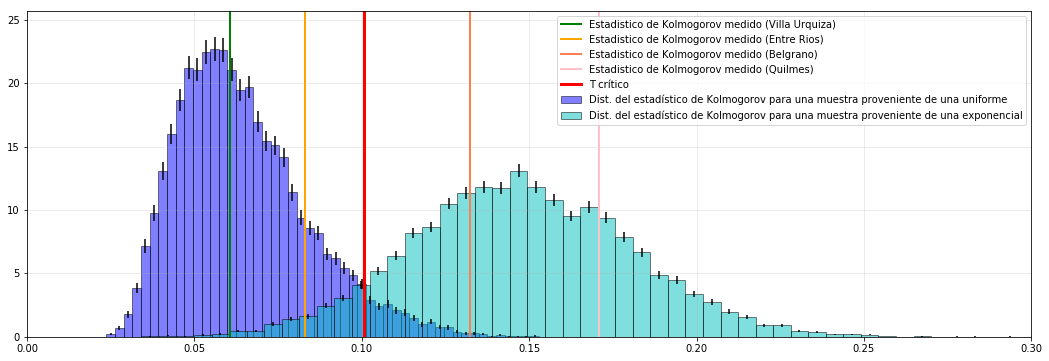

In [8]:
bins=50

"""Realizo las N simulaciones de patentes provenientes de distribuciones uniformes y exponenciales
y a todas ellas les calculo el estadístico de Kolmogorov"""
N=10000
y_simu = []
for i in range(N):
    y = sim_patentes_uniforme(patente1,patenteultima,k)
    y.sort()
    t_simu, i_simu, x_max_simu, y_max_simu = distancia(ye,y,e)
    y_simu.append(t_simu)

y_simexp = []
for i in range(N):
    y2 = sim_patentes_exp(patente1,patenteultima,beta,k)
    y2.sort()
    t_simexp, i_simexp, x_max_simexp, y_max_simexp = distancia(ye,y2,e)
    y_simexp.append(t_simexp)
    

"""Defino la significancia del test y decido si con el p-valor obtenido se acepta o no la H0"""
alpha = 0.05
pval_k = pvalor(y_simu,t_max,'derecha')
pval_k2 = pvalor(y_simu,t_max2,'derecha')
pval_k3 = pvalor(y_simu,t_max3,'derecha')
pval_k4 = pvalor(y_simu,t_max4,'derecha')


"""Chequeo para todas las muestras de patentes si se cumple la hipótesis nula o no, y ploteo el
mensaje correspondiente."""
if pval_k > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Villa Urquiza')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Villa Urquiza')

if pval_k2 > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k2,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Entre Rios')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k2,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Entre Rios')
    
if pval_k3 > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k3,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Belgrano')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k3,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Belgrano')
    
if pval_k4 > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k4,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Quilmes')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k4,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Quilmes')
    

    
"""Calculo el t crítico y la potencia del test."""
tc, pot = potencia(y_simu,y_simexp,alpha,'derecha')

print('La potencia del test es',pot)

#graficar el t crítico en los histogramas

"""Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
Esto lo uso más adelante para normalizar el error de cada bin en el histograma normalizado"""
normu, normbinsu = np.histogram(y_simu, bins= bins) 
normexp, normbinsexp = np.histogram(y_simexp, bins= bins) 
                                                
                                                



"""Grafico juntas las distribuciones del estadístico de Kolmogorov para ambas muestras (uniforme y exponencial). A su
vez grafico el t medido para cada muestra de patentes y el t crítico para la significancia alpha definida. Agrego también
los errores a los bins del histograma"""
plt.figure(figsize=(18,6))
nu, binsu, patchesu = plt.hist(y_simu, bins= bins, density=True, align='mid', facecolor='blue',
                               edgecolor='black', alpha=0.5)
nexp, binsexp, patchesexp = plt.hist(y_simexp, bins= bins, density=True, align='mid', facecolor='c',
                                     edgecolor='black', alpha=0.5)
plt.axvline(x=t_max,color='g', lw=2)
plt.axvline(x=t_max2,color='orange', lw=2)
plt.axvline(x=t_max3,color='coral', lw=2)
plt.axvline(x=t_max4,color='pink', lw=2)
plt.axvline(x=tc,color='r', lw=3)

"""Error de los bins del histograma normalizado, Posición en x de las barras de error y barras de error del histograma"""  
np.seterr(divide='ignore', invalid='ignore')
erroryu = np.sqrt(nu/(normu/nu))                                
xeu=np.linspace((binsu[1]+binsu[0])/2,(binsu[-1]+binsu[-2])/2,bins)
plt.bar(xeu, nu, yerr=erroryu,ecolor='black', alpha=0)          
erroryexp = np.sqrt(nexp/(normexp/nexp))                                
xeexp=np.linspace((binsexp[1]+binsexp[0])/2,(binsexp[-1]+binsexp[-2])/2,bins)  
plt.bar(xeexp, nexp, yerr=erroryexp,ecolor='black', alpha=0)          

plt.legend(('Estadistico de Kolmogorov medido (Villa Urquiza)',
            'Estadistico de Kolmogorov medido (Entre Rios)',
            'Estadistico de Kolmogorov medido (Belgrano)',
            'Estadistico de Kolmogorov medido (Quilmes)',
            'T crítico','Dist. del estadístico de Kolmogorov para una muestra proveniente de una uniforme',
            'Dist. del estadístico de Kolmogorov para una muestra proveniente de una exponencial'))
plt.axis([0,0.3,0,max(nu)+3])
plt.grid(alpha=0.3)

Se puede ver que que podemos aceptar la hipotesis nula para las patentes de Villa Urquiza y las de Entre Rios. Igualmente entre las dos, las de Villa Urquiza poseen un p-valor má alto, y el valor medido da muy cercano a la experanza de la distribución del estadístico.

En cambio las patentes de Belgrano y de Quilmes no parecen provenir de una uniforme sino de una exponencial. En estas el test da rechazo, y los p-valores son incluso menores al 1% de significancia.
Por último, la potencia del test es muy buena para la cantidad de muestras tomadas, porque nos da una potencia cercana a 1, lo que hace que el test sea muy bueno. Nosotros no solo necesitamos que el p-valor sea alto, sino que también queremos una potencia que tienda a 1 para así saber que podemos con confianza no estar cometiendo errores de tipo II.

Me interesa ver como cambian los histogramas en función de la cantidad de muestras de patentes k. Para eso repetí todo el código anterior, pero ahora los valores de patentes simulados son para muestras de tamaño k2 (que es el tamaño de la muestra de patentes de Entre Rios).

El p-valor del test de Kolmogorov-Smirnov es 0.9639 y al ser mayor que la significancia alpha = 0.05 , se acepta la hipótesis nula para las patentes de Villa Urquiza
El p-valor del test de Kolmogorov-Smirnov es 0.7516 y al ser mayor que la significancia alpha = 0.05 , se acepta la hipótesis nula para las patentes de Entre Rios
El p-valor del test de Kolmogorov-Smirnov es 0.1996 y al ser mayor que la significancia alpha = 0.05 , se acepta la hipótesis nula para las patentes de Belgrano
El p-valor del test de Kolmogorov-Smirnov es 0.0409 y al ser menor o igual que la significancia alpha = 0.05 , se rechaza la hipótesis nula para las patentes de Quilmes
La potencia del test es 0.5441


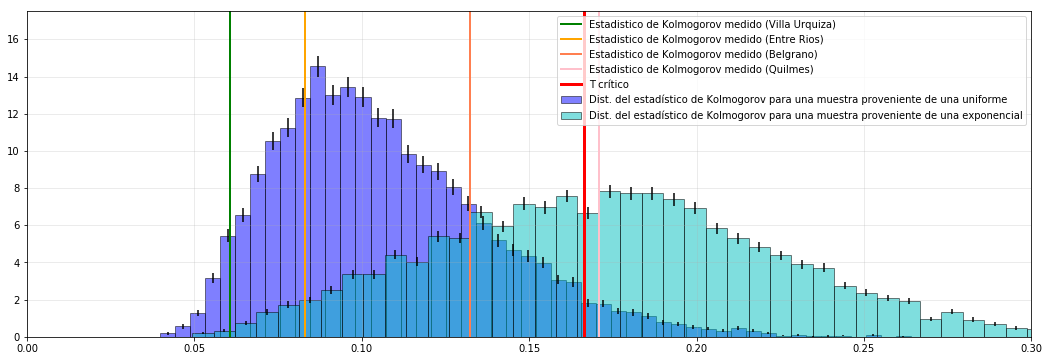

In [14]:
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#--------------------------COPIO EL CÓDIGO ANTERIOR SOLO CAMBIANDO EL TAMAÑO DE LA MUESTRA SIMULADA---------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

bins=50

"""Realizo las N simulaciones de patentes provenientes de distribuciones uniformes y exponenciales
y a todas ellas les calculo el estadístico de Kolmogorov"""
N=10000
y_simu = []
for i in range(N):
    y = sim_patentes_uniforme(patente1,patenteultima,k2)
    y.sort()
    t_simu, i_simu, x_max_simu, y_max_simu = distancia(ye2,y,e2)
    y_simu.append(t_simu)

y_simexp = []
for i in range(N):
    y2 = sim_patentes_exp(patente1,patenteultima,beta,k2)
    y2.sort()
    t_simexp, i_simexp, x_max_simexp, y_max_simexp = distancia(ye2,y2,e2)
    y_simexp.append(t_simexp)
    

"""Defino la significancia del test y decido si con el p-valor obtenido se acepta o no la H0"""
alpha = 0.05
pval_k = pvalor(y_simu,t_max,'derecha')
pval_k2 = pvalor(y_simu,t_max2,'derecha')
pval_k3 = pvalor(y_simu,t_max3,'derecha')
pval_k4 = pvalor(y_simu,t_max4,'derecha')


"""Chequeo para todas las muestras de patentes si se cumple la hipótesis nula o no, y ploteo el
mensaje correspondiente."""
if pval_k > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Villa Urquiza')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Villa Urquiza')

if pval_k2 > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k2,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Entre Rios')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k2,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Entre Rios')
    
if pval_k3 > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k3,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Belgrano')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k3,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Belgrano')
    
if pval_k4 > alpha:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k4,
          'y al ser mayor que la significancia alpha =',alpha,
          ', se acepta la hipótesis nula para las patentes de Quilmes')
else:
    print('El p-valor del test de Kolmogorov-Smirnov es',pval_k4,
          'y al ser menor o igual que la significancia alpha =',alpha,
          ', se rechaza la hipótesis nula para las patentes de Quilmes')
    

    
"""Calculo el t crítico y la potencia del test."""
tc, pot = potencia(y_simu,y_simexp,alpha,'derecha')

print('La potencia del test es',pot)

#graficar el t crítico en los histogramas

"""Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
Esto lo uso más adelante para normalizar el error de cada bin en el histograma normalizado"""
normu, normbinsu = np.histogram(y_simu, bins= bins) 
normexp, normbinsexp = np.histogram(y_simexp, bins= bins) 
                                                
                                                



"""Grafico juntas las distribuciones del estadístico de Kolmogorov para ambas muestras (uniforme y exponencial). A su
vez grafico el t medido para cada muestra de patentes y el t crítico para la significancia alpha definida. Agrego también
los errores a los bins del histograma"""
plt.figure(figsize=(18,6))
nu, binsu, patchesu = plt.hist(y_simu, bins= bins, density=True, align='mid', facecolor='blue',
                               edgecolor='black', alpha=0.5)
nexp, binsexp, patchesexp = plt.hist(y_simexp, bins= bins, density=True, align='mid', facecolor='c',
                                     edgecolor='black', alpha=0.5)
plt.axvline(x=t_max,color='g', lw=2)
plt.axvline(x=t_max2,color='orange', lw=2)
plt.axvline(x=t_max3,color='coral', lw=2)
plt.axvline(x=t_max4,color='pink', lw=2)
plt.axvline(x=tc,color='r', lw=3)

"""Error de los bins del histograma normalizado, Posición en x de las barras de error y barras de error del histograma"""  
np.seterr(divide='ignore', invalid='ignore')
erroryu = np.sqrt(nu/(normu/nu))                                
xeu=np.linspace((binsu[1]+binsu[0])/2,(binsu[-1]+binsu[-2])/2,bins)
plt.bar(xeu, nu, yerr=erroryu,ecolor='black', alpha=0)          
erroryexp = np.sqrt(nexp/(normexp/nexp))                                
xeexp=np.linspace((binsexp[1]+binsexp[0])/2,(binsexp[-1]+binsexp[-2])/2,bins)  
plt.bar(xeexp, nexp, yerr=erroryexp,ecolor='black', alpha=0)          

plt.legend(('Estadistico de Kolmogorov medido (Villa Urquiza)',
            'Estadistico de Kolmogorov medido (Entre Rios)',
            'Estadistico de Kolmogorov medido (Belgrano)',
            'Estadistico de Kolmogorov medido (Quilmes)',
            'T crítico','Dist. del estadístico de Kolmogorov para una muestra proveniente de una uniforme',
            'Dist. del estadístico de Kolmogorov para una muestra proveniente de una exponencial'))
plt.axis([0,0.3,0,max(nu)+3])
plt.grid(alpha=0.3)

Con menos muestras se puede ver que ahora el test empeoró, ya que las dos distribuciones solapan mucho más que antes. A su vez, cambiaron las conclusiones sobre la aceptación o no de las muestras, porque ahora por ejemplo la muestra proveniente de Belgrano da aceptada. La única que sigue siendo rechazada es la de Quilmes, pero por poco.

Otra cosa que se puede ver es que el valor de t medido para las patentes de Villa Urquiza ahora da cercano a la cola izquierda de la distribución del estadístico (proveniente de uniforme). Eso nos habla de la poca probabilidad que tiene de darnos **tan bien** el estadístico siendo que *se supone* tomamos tan pocas mediciones.

Por último se ve que disminuyó mucho la potencia dle test. Esto pone en evidencia la importancia del tamaño de las muestras en los tests, ya que no solo las distribuciones se *afinan* (disminuyendo su varianza) sino que esto también trae aparejado una disminución del t crítico (en el caso de hacerlo con cola derecha) y eso también aumenta la potencia del test.

## 4 -  La patente del auto más nuevo




Primero voy a repetir N veces (nuevamente 10000) el experimento de generar k realizaciones de una variable aleatoria con distribución uniforme en [1,n], y calculo el valor m (de la patente más nueva observada). Así puedo armar la distribución de P(m|k,n), y la comparo con la ecuación que da el ejercicio.
Además marqué las patentes más nuevas vistas en las muestras de Villa Urquiza, Entre Rios, Belgrano y Quilmes.

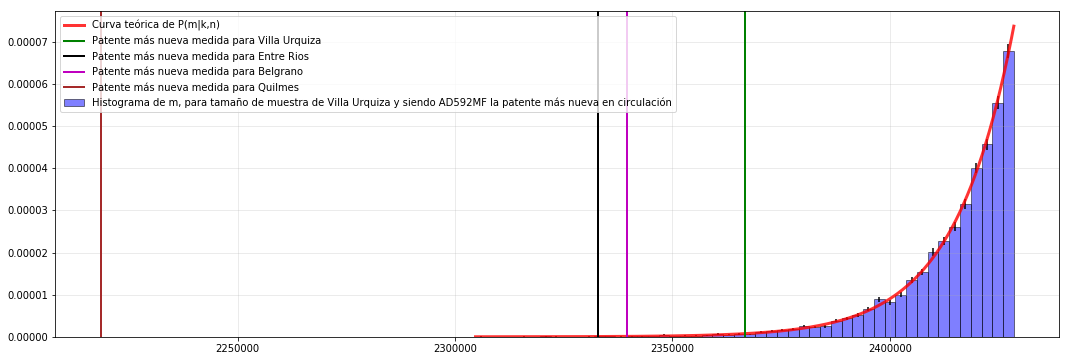

In [43]:
bins=50
N=10000

"""Primero genero muestras de k elementos que provengan de una dist. uniforme, y a esas muestras les calculo la patente más
nueva. Esto lo repito N veces y voy guardando esas patentes más nuevas en un vector y_masnueva"""
y_masnueva = []
for i in range(N):
    y = sim_patentes_uniforme(patente1,patenteultima+1,k)
    y.sort()
    m = max(y)
    y_masnueva.append(m)

"""Luego defino un vector (patentesposibles) que vaya desde la más chica de las patentes más nuevas observadas en la simulación
de los experimentos hasta la última posible (la más nueva en circulación). Esto lo hago para poder graficar la curva teórica
de la probabilidad P(m|k,n) solo en el rango del histograma que voy a hacer. Para cada una de las patentes en este intervalo
calculo la probabilidad P(m|k,n), y la guardo en otro vector y_patentesposibles"""
patentesposibles = np.arange(min(y_masnueva),patenteultima+1,1)
y_patentesposibles = []
for i in range(len(patentesposibles)):
    p = probpatentemasnueva(patentesposibles[i],k,patenteultima)
    y_patentesposibles.append(p)


    
    
"""Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
Esto lo uso más adelante para normalizar el error de cada bin en el histograma normalizado"""
norm_masnueva, normbins_masnueva = np.histogram(y_masnueva, bins= bins) 


"""Grafico el histograma de las patentes más nuevas observadas junto con la curva teórica de la probabilidad dada en el
ejercicio. Marcó también las patentes más nuevas vistas en las muestras de Villa Urquiza, Entre Rios, Belgrano y Quilmes"""

plt.figure(figsize=(18,6))
plt.plot(patentesposibles,y_patentesposibles,'r-', lw=3, alpha=0.8)
n_masnueva, bins_masnueva, patches_masnueva = plt.hist(y_masnueva, bins= bins, density=True, align='mid',
                                                       facecolor='blue', edgecolor='black', alpha=0.5)
errorymasnueva = np.sqrt(n_masnueva/(norm_masnueva/n_masnueva))                                
xemasnueva=np.linspace((bins_masnueva[1]+bins_masnueva[0])/2,(bins_masnueva[-1]+bins_masnueva[-2])/2,bins)  
plt.bar(xemasnueva, n_masnueva, yerr=errorymasnueva,ecolor='black', alpha=0)
plt.axvline(x=patentenueva,color='g', lw=2)
plt.axvline(x=patentenueva2,color='black', lw=2)
plt.axvline(x=patentenueva3,color='m', lw=2)
plt.axvline(x=patentenueva4,color='brown', lw=2)
plt.legend(('Curva teórica de P(m|k,n)','Patente más nueva medida para Villa Urquiza',
            'Patente más nueva medida para Entre Rios','Patente más nueva medida para Belgrano',
            'Patente más nueva medida para Quilmes',
            'Histograma de m, para tamaño de muestra de Villa Urquiza y siendo AD592MF la patente más nueva en circulación'))
plt.grid(alpha=0.3)

Se puede ver que muchas, pero no todas, de las barras de error del hisograma solapan con la curva teórica de la probabilidad esperada.

A su vez puedo ver que en Villa Urquiza fue el lugar donde vi la patente más nueva, seguido de Belgrano y Entre Rios. Las patentes de Quilmes fueron más viejas que las de estos lugares. Eso podría empezar a dar una idea sobre porque la muestra de Quilmes (proveniente de denuncias de robos) daba exponencial. Quizás había una mayor cantidad de patentes viejas (entre las nuevas) en los robos de autos. Eso podría tener que ver con el cuidado de la gente con los autos más nuevos, o de tecnologías antirrobo que van apareciendo, dificultando el robo de los más nuevos, haciendo que se prefiera robar algunos más viejos. Sería interesante hacer un analisis con patentes del viejo formato (AAA000) para ver que pasa en esos casos también y si ahí hay aún más cantidad de patentes denunciadas.

Volviendo a nuestro trabajo, se ve también que todas las patentes más nuevas vistas tienen poca probabilidad de haber sido vistas, comparadas a algunas más nuevas. Esto ya me hace pensar que en los casos de simular una muestra es más probable obtener un m mayor a los que yo vi. Veremos que pasa al llegar al item 7 que trata sobre esto.


Ahora me piden encontrar la probabilidad P(n|k,m). Para esto lo que hice fue calcular la probabilidad P(m|k,n) para un k y m fijos (en este caso utilicé los que provenian de la muestra de Villa Urquiza) en un intervalo apra n adecuado. Este intervalo adecuado fue creado de forma que al barrer desde m hasta más infinito la probabilidad dentro del intervalo sea aproximadamente 0.999. Se barre desde m porque sería imposible que habiendo visto la patente m, las más nueva en circulación sea menor a esta. Todo esto lo ahce la función 'bayes', que al darle los valores de m y k, nos devuelve un vector con todos los valores de patentes del intervalo [m,n] y un vector con sus valores de probabilidad (o densidad de probabilidad). También devuelve para que patentes (de índices c1 y c2) se alcanzó una probabiliad del 68% en el intervalo [m,c1+m] y del 95% en el intervalo [m,c2+m]. De esta forma se puede graficar la probabilidad P(n|k,m) con los vectores obtenidos. Cabe aclarar que la banda del 95% va desde donde termina la del 68%. Cabe decir también que estos CL no son iguales a los definidos cuando se hacían intervalos frecuentistas.

El intervalo para la patente más nueva en circulación con un CL del 68% es  [2366584, 2381624]
El intervalo para la patente más nueva en circulación con un CL del 95% es  [2366584, 2405386]


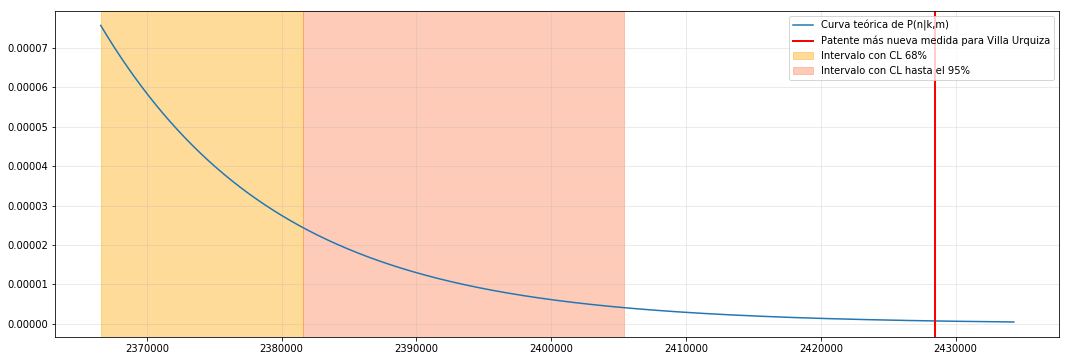

In [56]:
"""Obtengo los vectores que me permiten graficar P(n|k,m), y además los valores de patentes que delimitan el
intervalo de límite superior con CL del 68% y CL del 90%. Como son intervalos bayesianos sería más correcto hablar de """ 

patentesposibles, y_patentesposibles, c1, c2 = bayes(patentenueva,k)

C1, C2 = bayes_intervalo(patentenueva,k)

"""Grafico P(n|k,m) junto con las bandas donde se encuentra el intervalo con 68% de probabiliad y de 95% de probabilidad.
Cabe aclarar que la banda del 95% va desde donde termina la del 68%. Además marco la patente más nueva observada
para Villa Urquiza"""
plt.figure(figsize=(18,6))
plt.plot(patentesposibles,y_patentesposibles)
plt.axvline(x=patenteultima, color='r', lw=2)
plt.axvspan(patentenueva, patentesposibles[c1], ymin=0, ymax=1, color='orange', alpha=0.4)
plt.axvspan(patentesposibles[c1], patentesposibles[c2], ymin=0, ymax=1, color='coral', alpha=0.4)
plt.legend(('Curva teórica de P(n|k,m)','Patente más nueva medida para Villa Urquiza',
            'Intervalo con CL 68%',
            'Intervalo con CL hasta el 95%'))
plt.grid(alpha=0.3)

print('El intervalo para la patente más nueva en circulación con un CL del 68% es ',[patentenueva,patentesposibles[c1]])
print('El intervalo para la patente más nueva en circulación con un CL del 95% es ',[patentenueva,patentesposibles[c2]])

Se puede ver que la patentes más nueva en circulación queda fuera de los intervalos de CL 68% y 95%. Eso podría nuevamente indicar que fue raro no haber visto una patente más nueva en el tamaño de muestra que tomé.
Para chequear esto voy a repetir el código pero ahora para la muestra de Entre Rios, dónde vi una patente más vieja a la de Villa Urquiza, pero la muestra fue mucho más pequeña, a ver si esto genera una estimación para n que incluya al valor real.

El intervalo para la patente más nueva en circulación con un CL del 68% es  [2332835, 2374833]
El intervalo para la patente más nueva en circulación con un CL del 95% es  [2332835, 2437934]


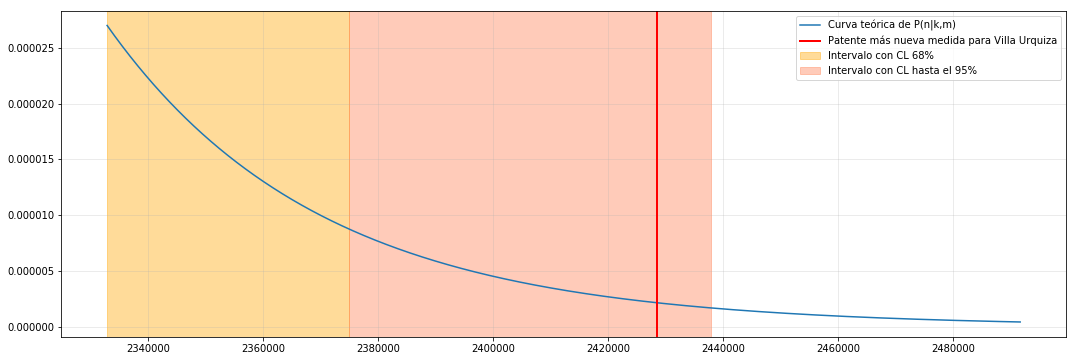

In [60]:
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#--------------------------COPIO EL CÓDIGO ANTERIOR SOLO CAMBIANDO LA MUESTRA SIMULADA----------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

"""Obtengo los vectores que me permiten graficar P(n|k,m), y además los valores de patentes que delimitan el
intervalo de límite superior con CL del 68% y CL del 90%. Como son intervalos bayesianos sería más correcto hablar de """ 

patentesposibles, y_patentesposibles, c1, c2 = bayes(patentenueva2,k2)

C1, C2 = bayes_intervalo(patentenueva2,k2)

"""Grafico P(n|k,m) junto con las bandas donde se encuentra el intervalo con 68% de probabiliad y de 95% de probabilidad.
Cabe aclarar que la banda del 95% va desde donde termina la del 68%. Además marco la patente más nueva observada
para Entre Rios"""
plt.figure(figsize=(18,6))
plt.plot(patentesposibles,y_patentesposibles)
plt.axvline(x=patenteultima, color='r', lw=2)
plt.axvspan(patentenueva2, patentesposibles[c1], ymin=0, ymax=1, color='orange', alpha=0.4)
plt.axvspan(patentesposibles[c1], patentesposibles[c2], ymin=0, ymax=1, color='coral', alpha=0.4)
plt.legend(('Curva teórica de P(n|k,m)','Patente más nueva medida para Villa Urquiza',
            'Intervalo con CL 68%',
            'Intervalo con CL hasta el 95%'))
plt.grid(alpha=0.3)

print('El intervalo para la patente más nueva en circulación con un CL del 68% es ',[patentenueva2,patentesposibles[c1]])
print('El intervalo para la patente más nueva en circulación con un CL del 95% es ',[patentenueva2,patentesposibles[c2]])

Ahora el valor real cae dentro del intervalo de CL 95%. Esto podría hablar de que la muestra tomada en Entre Rios es mejor para estimar el valor de patente más nueva en circulación, o de lo raro que fue no haber visto una patente más nueva en Villa Urquiza donde la muestra fue más grande.
Obviamente lo ideal es tener una muestra más grande, así los intervalos son más pequeños. Pero también es necesario que la patente más nueva vista tenga sentido para una muestra de ese tamaño. Veremos que pasa a la hora de hacer el item 7.

## 5 -  ¿Independiente del barrio?  - ...o la provincia?

Se pidió en este punto compartir la muestra con otras personas, pero aprovechando que tenía varias, utilicé algunas propias directamente. Miré algunas de las de otras personas pero solamente para ver curiosidad den las muestras, o comparar otras muestras de las mismas regiones (Como por ejemplo, vi otras muestras de Belgrano mucho *mejores* que las mías). Pero todo eso fue con motivos d einterés personal y no usé dichas muestras para los test que vienen a continuación.

Para comparar independencia me pareció que lo más interesante era comparar regiones lo más alejadas posibles, y para eso fue que conseguí en primer lugar una muestra de Entre Rios. Quise también comparar con Quilmes, pero como no pude comprobar su *uniformidad* decidí realizar los siguientes test solamente para las muestras de Villa Urquiza y Entre Rios.

Para eso primero apliqué el test de Wilcoxon para ver si ambas muestras provienen de poblaciones con la misma esperanza y le calculé el p-valor. En este caso el p-valor lo calculé a dos colas, ya que con el test sería igual de malo que me de un valor muy alto (lo que significa que una distribución tuvo predominancia sobre otra en cuanto al *orden* de las patentes) o que me de muy chico (que sería equivalente pero invirtiendo dicha predominancia). Hasta ahora los p-valores los había calculado a izquierza o derecha según el caso y según la distrbución. En este Se hace necesario hacerlo a dos colas.

Cabe aclarar también que por las dudas controlé que entre las muestras de Villa Urquiza y Entre Rios no hubiese ninguna patente en común, ya que en ese caso el estadístico de Wilcoxon tiene que tener estas repeticiones en cuenta. Al no tener ninguna repetida me pude evitar de programar esa opción en mi función 'wilcoxon'.

Luego grafiqué el histograma del estadístico de Wilcoxon calculado para N experimentos con muestras de iguales tamaños a las de Villa Urquiza y Entre Rios, provenientes de uniformes.

El p valor de wilcox es 0.4244


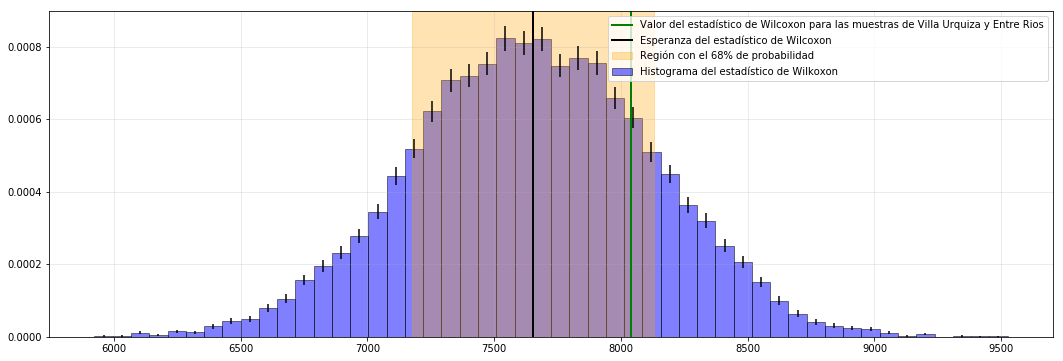

In [80]:
"""Aplico la función wilcoxon que realiza el test de Wilcoxon sobre dos muestras. Para eso primero controla que muestra es más
chica y a esa la marca como '1'. Luego mezcla las muestras y las ordena según su número de patente, para calcular el estadístico
como la suma de las posiciones de las patentes marcadas como '1'. A su vez devuelve el valor mínimo que podría tener el test,
el máximo, su esperanza y varianza. Esto lo hago para las muestras de Villa Urquiza y Entre Rios"""
w, w_min, w_max, w_med, w_var = wilcoxon(patentes,patentes2)

"""Luego simulo N veces muestras de iguales tamaños a las de Villa Urquiza y Entre Rios, provenientes de uniformes, y a ellas
les calculo el estadístico de Wilcoxon."""
N=10000
y_wilcox = []
for i in range(N):
    y1 = sim_patentes_uniforme(patente1,patenteultima,k)
    y2 = sim_patentes_uniforme(patente1,patenteultima,k2)
    w_sim, w_min_sim, w_max_sim, w_med_sim, w_var_sim = wilcoxon(y1,y2)
    y_wilcox.append(w_sim)



"""Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
Esto lo uso más adelante para normalizar el error de cada bin en el histograma normalizado"""
norm_wil, normbins_wil = np.histogram(y_wilcox, bins= bins) 


"""Grafico el histograma del estadístico de Wilcoxon para las muestras simuladas. Marcó también el valor del estadístico
medido para las muestras de Villa Urquiza y Entre Rios, la esperanza de la distribución y su sigma"""

plt.figure(figsize=(18,6))
n_wil, bins_wil, patches_wil = plt.hist(y_wilcox, bins= bins, density=True, align='mid',
                                                       facecolor='blue', edgecolor='black', alpha=0.5)
errorywil = np.sqrt(n_wil/(norm_wil/n_wil))                                
xewil=np.linspace((bins_wil[1]+bins_wil[0])/2,(bins_wil[-1]+bins_wil[-2])/2,bins)  
plt.bar(xewil, n_wil, yerr=errorywil,ecolor='black', alpha=0)
plt.axvline(x=w,color='g', lw=2)
plt.axvline(x=w_med,color='black', lw=2)
plt.axvspan(w_med - w_var**(1/2), w_med + w_var**(1/2), ymin=0, ymax=1, color='orange', alpha=0.3)
#plt.axvline(x=w_med + w_var**(1/2),color='r', lw=2)
#plt.axvline(x=w_med - w_var**(1/2),color='r', lw=2)
plt.legend(('Valor del estadístico de Wilcoxon para las muestras de Villa Urquiza y Entre Rios',
            'Esperanza del estadístico de Wilcoxon',
            'Región con el 68% de probabilidad',
            'Histograma del estadístico de Wilkoxon'))
#plt.axis([0,0.3,0,max(nu)+3])
plt.grid(alpha=0.3)


print('El p-valor del valor medido para el estadístico de Wilkoxon para las muestras de Entre Rios y Villa Urquiza es'
      ,pvalor(y_wilcox,w,'doscolas'))

El p-valor obtenido es indicador de que efectivamente las muestras provienen de  poblaciones con la misma esperanza. Incluso se puede ver a simple vista que el valor obtenido para mis muestras está dentro del intervalo central de CL 68%.

Ahora vamos a repetir la operación pero con otro estadístico, el estadístico U del problema  4 de la guía 8 sobre Test de Hipótesis.

El p valor de prob 4 es 0.4168


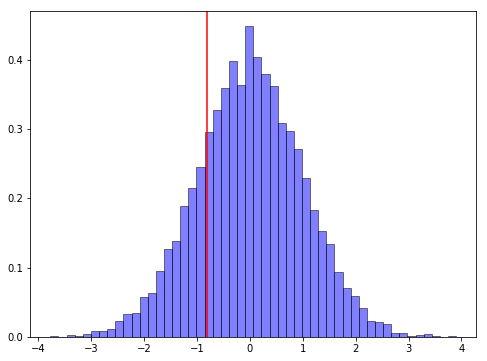

In [74]:
#el estadístico tenía distribución t-student si los datos eran gaussianos, pero acá son uniformes.
#------------------------

u = prob4(patentes,patentes2)


N=10000
y_prob4 = []
for i in range(N):
    y1 = sim_patentes_uniforme(patente1,patenteultima,k)
    y2 = sim_patentes_uniforme(patente1,patenteultima,k2)
    u_sim = prob4(y1,y2)
    y_prob4.append(u_sim)


bins=50

plt.figure(figsize=(8,6))
n5, bins5, patches5 = plt.hist(y_prob4, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.5)
plt.axvline(x=u, color='r')


print('El p valor de prob 4 es', pvalor(y_prob4,u,'doscolas'))

## 6 - Combinando los tests

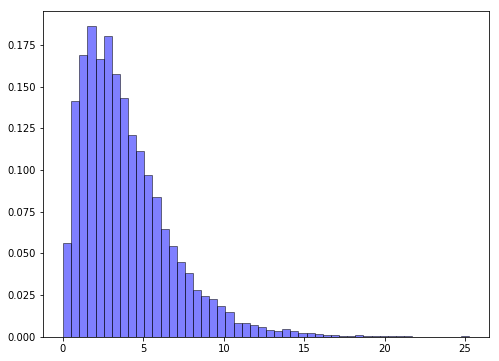

In [11]:
y_T = T(10000)

plt.figure(figsize=(8,6))
n_T, bins_T, patches_T = plt.hist(y_T, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.5)    

## 7 -  Sé tu propio verdugo

Finalmente me piden que pruebe la posibilidad de haberme inventado las muestras de patentes y para eso vamos a aplicar un test. El estadístico será la patente más nueva observada y su distribución es la que ya mostré en el item 4. Por eso voy a copiar el código utilizado al principio del item 4 donde puede verse la probabilidad P(m|k,n) y la patente más nueva observada, pero ahora además voy a calcular el p-valor.

A su vez, como quiero comparar que pasa si la muestra fue inventada (por ejemplo, armada aleatoriamente de una uniforme) voy a calcular también el p-valor de alguna de las simulaciones de muestras uniformes y su patente más nueva observada.

El p valor de haber visto la más nueva que vi, es de 0.0108
Si las patentes me las hubiese inventado daría 0.9728


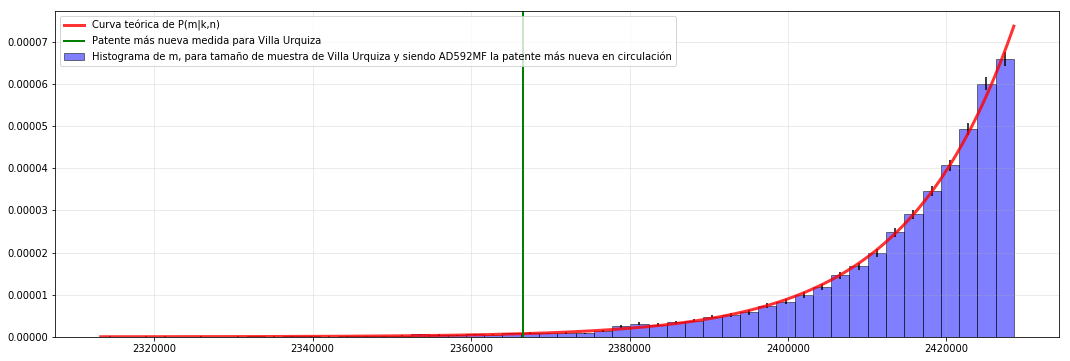

In [69]:
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#--------------------------COPIO EL CÓDIGO DEL ITEM 4-------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

bins=50
N=10000

"""Primero genero muestras de k elementos que provengan de una dist. uniforme, y a esas muestras les calculo la patente más
nueva. Esto lo repito N veces y voy guardando esas patentes más nuevas en un vector y_masnueva"""
y_masnueva = []
for i in range(N):
    y = sim_patentes_uniforme(patente1,patenteultima+1,k)
    y.sort()
    m = max(y)
    y_masnueva.append(m)

"""Luego defino un vector (patentesposibles) que vaya desde la más chica de las patentes más nuevas observadas en la simulación
de los experimentos hasta la última posible (la más nueva en circulación). Esto lo hago para poder graficar la curva teórica
de la probabilidad P(m|k,n) solo en el rango del histograma que voy a hacer. Para cada una de las patentes en este intervalo
calculo la probabilidad P(m|k,n), y la guardo en otro vector y_patentesposibles"""
patentesposibles = np.arange(min(y_masnueva),patenteultima+1,1)
y_patentesposibles = []
for i in range(len(patentesposibles)):
    p = probpatentemasnueva(patentesposibles[i],k,patenteultima)
    y_patentesposibles.append(p)


    
    
"""Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
Esto lo uso más adelante para normalizar el error de cada bin en el histograma normalizado"""
norm_masnueva, normbins_masnueva = np.histogram(y_masnueva, bins= bins) 


"""Grafico el histograma de las patentes más nuevas observadas junto con la curva teórica de la probabilidad dada en el
ejercicio. Marcó también las patentes más nuevas vistas en las muestras de Villa Urquiza"""

plt.figure(figsize=(18,6))
plt.plot(patentesposibles,y_patentesposibles,'r-', lw=3, alpha=0.8)
n_masnueva, bins_masnueva, patches_masnueva = plt.hist(y_masnueva, bins= bins, density=True, align='mid',
                                                       facecolor='blue', edgecolor='black', alpha=0.5)
errorymasnueva = np.sqrt(n_masnueva/(norm_masnueva/n_masnueva))                                
xemasnueva=np.linspace((bins_masnueva[1]+bins_masnueva[0])/2,(bins_masnueva[-1]+bins_masnueva[-2])/2,bins)  
plt.bar(xemasnueva, n_masnueva, yerr=errorymasnueva,ecolor='black', alpha=0)
plt.axvline(x=patentenueva,color='g', lw=2)
plt.legend(('Curva teórica de P(m|k,n)','Patente más nueva medida para Villa Urquiza',
            'Histograma de m, para tamaño de muestra de Villa Urquiza y siendo AD592MF la patente más nueva en circulación'))
plt.grid(alpha=0.3)

#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------AHORA CALCULO EL P-VALOR-----------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------


"""Calculo el p-valor de mi patente más nueva observada"""
pval = pvalor(y_masnueva,patentenueva,'izquierda')

"""Calculo el p-valor de la patente más nueva observada en una de las muestras simuladas desde una uniforme. La función
'pvalor' la última de esas muestras de simulación que se generó previamente con el programa y quedó guardada en memoria."""
pval_m = pvalor(y_masnueva,m,'izquierda')

print('El p valor de haber visto la más nueva que vi, es de',pval)
print('Si las patentes me las hubiese inventado daría',pval_m)

De nuevo, parece muy poco probable que en una muestra de mi tamaño haya visto una patente *más grande* **tan baja**. PAra chequear esto voy a realizar la misma operación pero para las patentes de Entre Rios.

El p valor de haber visto la más nueva que vi, es de 0.0765
Si las patentes me las hubiese inventado daría 0.3412


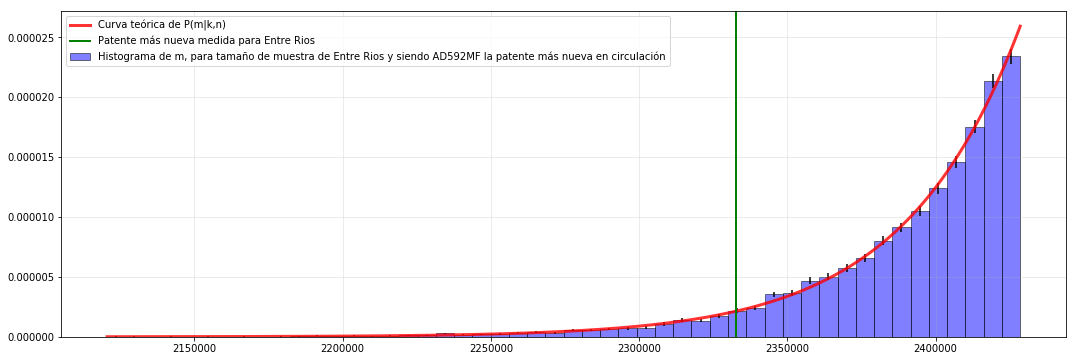

In [70]:
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#--------------------------COPIO EL CÓDIGO DEL ITEM 4 PERO CAMBIANDO LA MUESTRA POR LA DE ENTRE RIOS--------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

bins=50
N=10000

"""Primero genero muestras de k elementos que provengan de una dist. uniforme, y a esas muestras les calculo la patente más
nueva. Esto lo repito N veces y voy guardando esas patentes más nuevas en un vector y_masnueva"""
y_masnueva = []
for i in range(N):
    y = sim_patentes_uniforme(patente1,patenteultima+1,k2)
    y.sort()
    m = max(y)
    y_masnueva.append(m)

"""Luego defino un vector (patentesposibles) que vaya desde la más chica de las patentes más nuevas observadas en la simulación
de los experimentos hasta la última posible (la más nueva en circulación). Esto lo hago para poder graficar la curva teórica
de la probabilidad P(m|k,n) solo en el rango del histograma que voy a hacer. Para cada una de las patentes en este intervalo
calculo la probabilidad P(m|k,n), y la guardo en otro vector y_patentesposibles"""
patentesposibles = np.arange(min(y_masnueva),patenteultima+1,1)
y_patentesposibles = []
for i in range(len(patentesposibles)):
    p = probpatentemasnueva(patentesposibles[i],k2,patenteultima)
    y_patentesposibles.append(p)


    
    
"""Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
Esto lo uso más adelante para normalizar el error de cada bin en el histograma normalizado"""
norm_masnueva, normbins_masnueva = np.histogram(y_masnueva, bins= bins) 


"""Grafico el histograma de las patentes más nuevas observadas junto con la curva teórica de la probabilidad dada en el
ejercicio. Marcó también las patentes más nuevas vistas en las muestras de Entre Rios"""

plt.figure(figsize=(18,6))
plt.plot(patentesposibles,y_patentesposibles,'r-', lw=3, alpha=0.8)
n_masnueva, bins_masnueva, patches_masnueva = plt.hist(y_masnueva, bins= bins, density=True, align='mid',
                                                       facecolor='blue', edgecolor='black', alpha=0.5)
errorymasnueva = np.sqrt(n_masnueva/(norm_masnueva/n_masnueva))                                
xemasnueva=np.linspace((bins_masnueva[1]+bins_masnueva[0])/2,(bins_masnueva[-1]+bins_masnueva[-2])/2,bins)  
plt.bar(xemasnueva, n_masnueva, yerr=errorymasnueva,ecolor='black', alpha=0)
plt.axvline(x=patentenueva2,color='g', lw=2)
plt.legend(('Curva teórica de P(m|k,n)','Patente más nueva medida para Entre Rios',
            'Histograma de m, para tamaño de muestra de Entre Rios y siendo AD592MF la patente más nueva en circulación'))
plt.grid(alpha=0.3)

#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------AHORA CALCULO EL P-VALOR-----------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------


"""Calculo el p-valor de mi patente más nueva observada"""
pval = pvalor(y_masnueva,patentenueva2,'izquierda')

"""Calculo el p-valor de la patente más nueva observada en una de las muestras simuladas desde una uniforme. La función
'pvalor' la última de esas muestras de simulación que se generó previamente con el programa y quedó guardada en memoria."""
pval_m = pvalor(y_masnueva,m,'izquierda')

print('El p valor de haber visto la más nueva que vi, es de',pval)
print('Si las patentes me las hubiese inventado daría',pval_m)

Si bien esta vez el p-valor da más alto, lo que me llama la atención es que en casi todas las corridas del programa el p-valor de las patentes simuladas (es decir, que si fueron inventadas) da mayor al de las patentes vistas.
Pienso que eso está relacionado con que inventarlas como provenientes de una uniforme, es quizás la mejor forma de inventarselas, y en realidad debería compararlo contra una muestra inventada *a mano*.

Igualmente en ambos casos el p-valor dió mayor al 1%, con lo cuál si tomo una significancia máxima α = 0.01, puedo aceptar tranquilo la hipotesis de que no inventé mis patentes (pensando H0 como no haber inventado mis patentes). A su vez podría tomar una significancia mínima α_min = 0.08 para poder decir que si el p-valor da mayor a dicha significancia, las patentes son *demasiado buenas para ser verdad* (En este caso, tomando com HO que las patentes fueron inventadas, y en caso de ser el p-valor menor a la significancia, la hipotesis alternativa es que las observé realmente).